<a href="https://www.bigdatauniversity.com"><img src="https://ibm.box.com/shared/static/qo20b88v1hbjztubt06609ovs85q8fau.png" width="400px" align="center"></a>

<h1 align="center"><font size="5">TENSORFLOW'S HELLO WORLD</font></h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
<font size = 3><strong>In this notebook we will overview the basics of TensorFlow, learn it's structure and see what is the motivation to use it</strong></font>
<br>
<h2>Table of Contents</h2>
<ol>
    <li><a href="#ref2">How does TensorFlow work?</a></li>
    <li><a href="#ref3">Building a Graph</a></li>
    <li><a href="#ref4">Defining multidimensional arrays using TensorFlow</a></li>
    <li><a href="#ref5">Why Tensors?</a></li>
    <li><a href="#ref6">Variables</a></li>
    <li><a href="#ref7">Placeholders</a></li>
    <li><a href="#ref8">Operations</a></li>
</ol>
<p></p>
</div>
<br>

<hr>

<a id="ref2"></a>
<h2>How does TensorFlow work?</h2>
TensorFlow defines computations as Graphs, and these are made with operations (also know as “ops”). So, when we work with TensorFlow, it is the same as defining a series of operations in a Graph.

To execute these operations as computations, we must launch the Graph into a Session. The session translates and passes the operations represented into the graphs to the device you want to execute them on, be it a GPU or CPU. In fact, TensorFlow's capability to execute the code on different devices such as CPUs and GPUs is a consequence of it's specific structure.

For example, the image below represents a graph in TensorFlow. <b>W</b>, <b>x</b> and b are tensors over the edges of this graph. <b>MatMul</b> is an operation over the tensors <b>W</b> and <b>x</b>, after that <b>Add</b> is called and add the result of the previous operator with <b>b</b>. The resultant tensors of each operation cross the next one until the end where it's possible to get the wanted result.

<img src='https://ibm.box.com/shared/static/a94cgezzwbkrq02jzfjjljrcaozu5s2q.png'>


<h2>Importing TensorFlow</h2>
<p>To use TensorFlow, we need to import the library. We imported it and optionally gave it the name "tf", so the modules can be accessed by <b>tf.module-name</b>:</p>

In [1]:
import tensorflow as tf

-----------------

In [9]:
tf.__version__

'2.2.0'

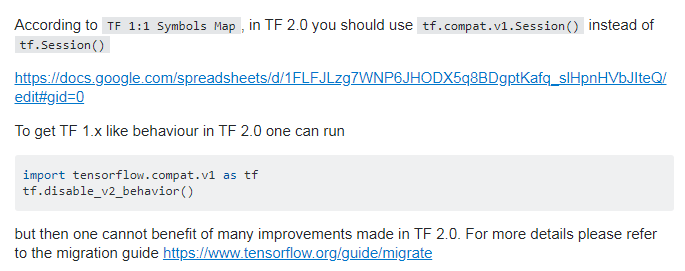

 https://www.tensorflow.org/guide/migrate

In [10]:
import tensorflow.compat.v1 as tf
tf.disable_v2_behavior()

Instructions for updating:
non-resource variables are not supported in the long term


<a id="ref3"></a>
# Building a Graph

As we said before, TensorFlow works as a graph computational model. Let's create our first graph which we named as <b>graph1</b>.

In [11]:
graph1 = tf.Graph()

Now we call the TensorFlow functions that construct new <b>tf.Operation</b> and <b>tf.Tensor</b> objects and add them to the <b>graph1</b>. As mentioned, each <b>tf.Operation</b> is a <b>node</b> and each <b>tf.Tensor</b> is an edge in the graph.

Lets add 2 constants to our graph. For example, calling tf.constant([2], name = 'constant_a') adds a single <b>tf.Operation</b> to the default graph. This operation produces the value 2, and returns a <b>tf.Tensor</b> that represents the value of the constant.  
<b>Notice:</b> tf.constant([2], name="constant_a") creates a new tf.Operation named "constant_a" and returns a tf.Tensor named "constant_a:0".

In [12]:
with graph1.as_default():
    a = tf.constant([2], name = 'constant_a')
    b = tf.constant([3], name = 'constant_b')

Lets look at the tensor __a__.

In [13]:
a

<tf.Tensor 'constant_a:0' shape=(1,) dtype=int32>

As you can see, it just show the name, shape and type of the tensor in the graph. We will see it's value when we run it in a TensorFlow session.

In [14]:
# Printing the value of a
sess = tf.Session(graph = graph1)
result = sess.run(a)
print(result)
sess.close()

[2]


After that, let's make an operation over these tensors. The function <b>tf.add()</b> adds two tensors (you could also use `c = a + b`). 

In [15]:
with graph1.as_default():
    c = tf.add(a, b)
    #c = a + b is also a way to define the sum of the terms

Then TensorFlow needs to initialize a session to run our code. Sessions are, in a way, a context for creating a graph inside TensorFlow. Let's define our session:

In [16]:
sess = tf.Session(graph = graph1)

Let's run the session to get the result from the previous defined 'c' operation:

In [17]:
result = sess.run(c)
print(result)

[5]


Close the session to release resources:

In [18]:
sess.close()

To avoid having to close sessions every time, we can define them in a <b>with</b> block, so after running the <b>with</b> block the session will close automatically:

In [19]:
with tf.Session(graph = graph1) as sess:
    result = sess.run(c)
    print(result)

[5]


Even this silly example of adding 2 constants to reach a simple result defines the basis of TensorFlow. Define your operations (In this case our constants and _tf.add_), and start a session to build a graph.

<h3>What is the meaning of Tensor?</h3>

<div class="alert alert-success alertsuccess" style="margin-top: 20px">
<font size = 3><strong>In TensorFlow all data is passed between operations in a computation graph, and these are passed in the form of Tensors, hence the name of TensorFlow.</strong></font>
<br>
<br>
    The word <b>tensor</b> from new latin means "that which stretches". It is a mathematical object that is named "tensor" because an early application of tensors was the study of materials stretching under tension. The contemporary meaning of tensors can be taken as multidimensional arrays. 



</div>

That's great, but... what are these multidimensional arrays? 

Going back a little bit to physics to understand the concept of dimensions:<br>
<img src="https://ibm.box.com/shared/static/ymn0hl3hf8s3xb4k15v22y5vmuodnue1.svg"/>
<div style="text-align:center"><a href="https://en.wikipedia.org/wiki/Dimension">Image Source</a></div>
<br>

The zero dimension can be seen as a point, a single object or a single item.

The first dimension can be seen as a line, a one-dimensional array can be seen as numbers along this line, or as points along the line. One dimension can contain infinite zero dimension/points elements.

The second dimension can be seen as a surface, a two-dimensional array can be seen as an infinite series of lines along an infinite line. 

The third dimension can be seen as volume, a three-dimensional array can be seen as an infinite series of surfaces along an infinite line.

The Fourth dimension can be seen as the hyperspace or spacetime, a volume varying through time, or an infinite series of volumes along an infinite line. And so forth on...

As mathematical objects: <br><br>
<img src="https://ibm.box.com/shared/static/kmxz570uai8eeg6i6ynqdz6kmlx1m422.png">
<div style="text-align: center"><a href="https://book.mql4.com/variables/arrays">Image Source</a></div>

Summarizing:<br><br>
<table style="width:100%">
  <tr>
    <td><b>Dimension</b></td>
    <td><b>Physical Representation</b></td> 
    <td><b>Mathematical Object</b></td>
    <td><b>In Code</b></td>
  </tr>
  
  <tr>
    <td>Zero </td>
    <td>Point</td> 
    <td>Scalar (Single Number)</td>
    <td>[ 1 ]</td>
  </tr>

  <tr>
    <td>One</td>
    <td>Line</td> 
    <td>Vector (Series of Numbers) </td>
    <td>[ 1,2,3,4,... ]</td>
  </tr>
  
   <tr>
    <td>Two</td>
    <td>Surface</td> 
    <td>Matrix (Table of Numbers)</td>
       <td>[ [1,2,3,4,...], [1,2,3,4,...], [1,2,3,4,...],... ]</td>
  </tr>
  
   <tr>
    <td>Three</td>
    <td>Volume</td> 
    <td>Tensor (Cube of Numbers)</td>
    <td>[ [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...],...], [[1,2,...], [1,2,...], [1,2,...] ,...]... ]</td>
  </tr>
  
</table>


-----------------

<a id="ref4"></a>
<h2>Defining multidimensional arrays using TensorFlow</h2>
Now we will try to define such arrays using TensorFlow:

In [21]:
help(tf.Graph().as_default)

Help on method as_default in module tensorflow.python.framework.ops:

as_default() method of tensorflow.python.framework.ops.Graph instance
    Returns a context manager that makes this `Graph` the default graph.
    
    This method should be used if you want to create multiple graphs
    in the same process. For convenience, a global default graph is
    provided, and all ops will be added to this graph if you do not
    create a new graph explicitly.
    
    Use this method with the `with` keyword to specify that ops created within
    the scope of a block should be added to this graph. In this case, once
    the scope of the `with` is exited, the previous default graph is set again
    as default. There is a stack, so it's ok to have multiple nested levels
    of `as_default` calls.
    
    The default graph is a property of the current thread. If you
    create a new thread, and wish to use the default graph in that
    thread, you must explicitly add a `with g.as_default():` in

In [22]:
graph2 = tf.Graph()
with graph2.as_default():
    Scalar = tf.constant(2)
    Vector = tf.constant([5,6,2])
    Matrix = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
    Tensor = tf.constant( [ [[1,2,3],[2,3,4],[3,4,5]] , [[4,5,6],[5,6,7],[6,7,8]] , [[7,8,9],[8,9,10],[9,10,11]] ] )
with tf.Session(graph = graph2) as sess:
    result = sess.run(Scalar)
    print ("Scalar (1 entry):\n %s \n" % result)
    result = sess.run(Vector)
    print ("Vector (3 entries) :\n %s \n" % result)
    result = sess.run(Matrix)
    print ("Matrix (3x3 entries):\n %s \n" % result)
    result = sess.run(Tensor)
    print ("Tensor (3x3x3 entries) :\n %s \n" % result)

Scalar (1 entry):
 2 

Vector (3 entries) :
 [5 6 2] 

Matrix (3x3 entries):
 [[1 2 3]
 [2 3 4]
 [3 4 5]] 

Tensor (3x3x3 entries) :
 [[[ 1  2  3]
  [ 2  3  4]
  [ 3  4  5]]

 [[ 4  5  6]
  [ 5  6  7]
  [ 6  7  8]]

 [[ 7  8  9]
  [ 8  9 10]
  [ 9 10 11]]] 



<b>tf.shape</b> returns the shape of our data structure.

In [23]:
Scalar.shape

TensorShape([])

In [25]:
Vector.shape

TensorShape([Dimension(3)])

In [26]:
Matrix.shape

TensorShape([Dimension(3), Dimension(3)])

In [24]:
Tensor.shape

TensorShape([Dimension(3), Dimension(3), Dimension(3)])

Now that you understand these data structures, I encourage you to play with them using some previous functions to see how they will behave, according to their structure types:

In [27]:
graph3 = tf.Graph()
with graph3.as_default():
    Matrix_one = tf.constant([[1,2,3],[2,3,4],[3,4,5]])
    Matrix_two = tf.constant([[2,2,2],[2,2,2],[2,2,2]])

    add_1_operation = tf.add(Matrix_one, Matrix_two)
    add_2_operation = Matrix_one + Matrix_two

with tf.Session(graph =graph3) as sess:
    result = sess.run(add_1_operation)
    print ("Defined using tensorflow function :")
    print(result)
    result = sess.run(add_2_operation)
    print ("Defined using normal expressions :")
    print(result)

Defined using tensorflow function :
[[3 4 5]
 [4 5 6]
 [5 6 7]]
Defined using normal expressions :
[[3 4 5]
 [4 5 6]
 [5 6 7]]


With the regular symbol definition and also the TensorFlow function we were able to get an element-wise multiplication, also known as Hadamard product. <br>

But what if we want the regular matrix product?

We then need to use another TensorFlow function called <b>tf.matmul()<b>:

In [28]:
graph4 = tf.Graph()
with graph4.as_default():
    Matrix_one = tf.constant([[2,3],[3,4]])
    Matrix_two = tf.constant([[2,3],[3,4]])

    mul_operation = tf.matmul(Matrix_one, Matrix_two)
    mul_operation_normal = Matrix_one * Matrix_two

with tf.Session(graph = graph4) as sess:
    result = sess.run(mul_operation)
    print ("Defined using tensorflow function :")
    print(result)
    result = sess.run(mul_operation_normal)
    print ("Defined using normal function :")
    print(result)

Defined using tensorflow function :
[[13 18]
 [18 25]]
Defined using normal function :
[[ 4  9]
 [ 9 16]]


We could also define this multiplication ourselves, but there is a function that already does that, so no need to reinvent the wheel!

-----------------

<a id="ref5"></a>
<h2>Why Tensors?</h2>

The Tensor structure helps us by giving the freedom to shape the dataset in the way we want.

And it is particularly helpful when dealing with images, due to the nature of how information in images are encoded,

Thinking about images, its easy to understand that it has a height and width, so it would make sense to represent the information contained in it with a two dimensional structure (a matrix)... until you remember that images have colors, and to add information about the colors, we need another dimension, and thats when Tensors become particularly helpful.

Images are encoded into color channels, the image data is represented into each color intensity in a color channel at a given point, the most common one being RGB, which means Red, Blue and Green. The information contained into an image is the intensity of each channel color into the width and height of the image, just like this:

<img src='https://ibm.box.com/shared/static/xlpv9h5xws248c09k1rlx7cer69y4grh.png'>
<a href="https://msdn.microsoft.com/en-us/library/windows/desktop/dn424131.aspx">Image Source</a>

So the intensity of the red channel at each point with width and height can be represented into a matrix, the same goes for the blue and green channels, so we end up having three matrices, and when these are combined they form a tensor. 


-----------------

<a id="ref6"></a>
# Variables

Now that we are more familiar with the structure of data, we will take a look at how TensorFlow handles variables.
<b>First of all, having tensors, why do we need variables?</b>  
TensorFlow variables are used to share and persistent some stats that are manipulated by our program. That is, when you define a variable, TensorFlow adds a <b>tf.Operation</b> to your graph. Then, this operation will store a writable tensor value that persists between tf.Session.run calls. So, you can update the value of a variable through each run, while you cannot update tensor (e.g a tensor created by tf.constant()) through multiple runs in a session. 

<b>How to define a variable?</b>  
To define variables we use the command <b>tf.Variable()</b>.
To be able to use variables in a computation graph it is necessary to initialize them before running the graph in a session. This is done by running <b>tf.global_variables_initializer()</b>.

To update the value of a variable, we simply run an assign operation that assigns a value to the variable:

In [29]:
v = tf.Variable(0)

Let's first create a simple counter, a variable that increases one unit at a time:

To do this we use the <b>tf.assign(reference_variable, value_to_update)</b> command. <b>tf.assign</b> takes in two arguments, the <b>reference_variable</b> to update, and assign it to the <b>value_to_update</b> it by.

In [30]:
update = tf.assign(v, v+1)

Variables must be initialized by running an initialization operation after having launched the graph.  We first have to add the initialization operation to the graph:

In [31]:
init_op = tf.global_variables_initializer()

We then start a session to run the graph, first initialize the variables, then print the initial value of the <b>state</b> variable, and then run the operation of updating the <b>state</b> variable and printing the result after each update:

In [32]:
with tf.Session() as session:
    session.run(init_op)
    print(session.run(v))
    for _ in range(3):
        session.run(update)
        print(session.run(v))

0
1
2
3


-----------------

<a id="ref7"></a>
# Placeholders

Now we know how to manipulate variables inside TensorFlow graph, but what about feeding data outside of a TensorFlow graph? 

If you want to feed data to a TensorFlow graph from outside a graph, you will need to use placeholders.

So <b>what are these placeholders and what do they do?</b> 

Placeholders can be seen as "holes" in your model, "holes" which you will pass the data to, you can create them using <br> <b>tf.placeholder(_datatype_)</b>, where <b>_datatype_</b> specifies the type of data (integers, floating points, strings, booleans) along with its precision (8, 16, 32, 64) bits.

The definition of each data type with the respective python syntax is defined as:

|Data type	|Python type|Description|
| --------- | --------- | --------- |
|DT_FLOAT	|tf.float32	|32 bits floating point.|
|DT_DOUBLE	|tf.float64	|64 bits floating point.|
|DT_INT8	|tf.int8	|8 bits signed integer.|
|DT_INT16	|tf.int16	|16 bits signed integer.|
|DT_INT32	|tf.int32	|32 bits signed integer.|
|DT_INT64	|tf.int64	|64 bits signed integer.|
|DT_UINT8	|tf.uint8	|8 bits unsigned integer.|
|DT_STRING	|tf.string	|Variable length byte arrays. Each element of a Tensor is a byte array.|
|DT_BOOL	|tf.bool	|Boolean.|
|DT_COMPLEX64	|tf.complex64	|Complex number made of two 32 bits floating points: real and imaginary parts.|
|DT_COMPLEX128	|tf.complex128	|Complex number made of two 64 bits floating points: real and imaginary parts.|
|DT_QINT8	|tf.qint8	|8 bits signed integer used in quantized Ops.|
|DT_QINT32	|tf.qint32	|32 bits signed integer used in quantized Ops.|
|DT_QUINT8	|tf.quint8	|8 bits unsigned integer used in quantized Ops.|


So we create a placeholder:

In [33]:
a = tf.placeholder(tf.float32)

And define a simple multiplication operation:

In [34]:
b = a * 2

Now we need to define and run the session, but since we created a "hole" in the model to pass the data, when we initialize the session we are obligated to pass an argument with the data, otherwise we would get an error.

To pass the data into the model we call the session with an extra argument <b>feed_dict</b> in which we should pass a dictionary with each placeholder name followed by its respective data, just like this:

In [35]:
with tf.Session() as sess:
    result = sess.run(b,feed_dict={a:3.5})
    print (result)

7.0


Since data in TensorFlow is passed in form of multidimensional arrays we can pass any kind of tensor through the placeholders to get the answer to the simple multiplication operation:

In [36]:
dictionary={a: [ [ [1,2,3],[4,5,6],[7,8,9],[10,11,12] ] , [ [13,14,15],[16,17,18],[19,20,21],[22,23,24] ] ] }

with tf.Session() as sess:
    result = sess.run(b,feed_dict=dictionary)
    print (result)

[[[ 2.  4.  6.]
  [ 8. 10. 12.]
  [14. 16. 18.]
  [20. 22. 24.]]

 [[26. 28. 30.]
  [32. 34. 36.]
  [38. 40. 42.]
  [44. 46. 48.]]]


<hr>

<a id="ref8"></a>
<hr>Operations</h2>

Operations are nodes that represent the mathematical operations over the tensors on a graph. These operations can be any kind of functions, like add and subtract tensor or maybe an activation function.

<b>tf.constant</b>, <b>tf.matmul</b>, <b>tf.add</b>, <b>tf.nn.sigmoid</b> are some of the operations in TensorFlow. These are like functions in python but operate directly over tensors and each one does a specific thing. 
<div class="alert alert-success alertsuccess" style="margin-top: 20px">Other operations can be easily found in: <a href="https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html">https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html</a></div>

In [37]:
graph5 = tf.Graph()
with graph5.as_default():
    a = tf.constant([5])
    b = tf.constant([2])
    c = tf.add(a,b)
    d = tf.subtract(a,b)

with tf.Session(graph = graph5) as sess:
    result = sess.run(c)
    print ('c =: %s' % result)
    result = sess.run(d)
    print ('d =: %s' % result)

c =: [7]
d =: [3]


<b>tf.nn.sigmoid</b> is an activation function, it's a little more complicated, but this function helps learning models to evaluate what kind of information is good or not.

-----------------

### References:

https://www.tensorflow.org/versions/r0.9/get_started/index.html<br>
http://jrmeyer.github.io/tutorial/2016/02/01/TensorFlow-Tutorial.html<br>
https://www.tensorflow.org/versions/r0.9/api_docs/python/index.html<br>
<a href="https://www.tensorflow.org/api_docs/python/">https://www.tensorflow.org/versions/r0.9/resources/dims_types.html</a><br>
https://en.wikipedia.org/wiki/Dimension<br>
https://book.mql4.com/variables/arrays<br>
https://msdn.microsoft.com/en-us/library/windows/desktop/dn424131(v=vs.85).aspx<br>

<hr>

Copyright &copy; 2018 [Cognitive Class](https://cocl.us/DX0108EN_CC). This notebook and its source code are released under the terms of the [MIT License](https://bigdatauniversity.com/mit-license/).